In [1]:
import numpy as np
import time

# Function to multiply two matrices using list of lists
def multiply_matrices_list(a, b):
    result = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]
    return result

n, k, m = 100, 100, 100  # you can change these values
a = [[1 for _ in range(k)] for _ in range(n)]
b = [[1 for _ in range(m)] for _ in range(k)]

#list of lists
start_time = time.time()
multiply_matrices_list(a, b)
list_time = time.time() - start_time
print(f"Time taken using list of lists: {list_time} seconds")


a_np = np.array(a)
b_np = np.array(b)


start_time = time.time()
np.matmul(a_np, b_np)
numpy_time = time.time() - start_time
print(f"Time taken using numpy: {numpy_time} seconds")


if list_time < numpy_time:
    print("List of lists is faster.")
elif list_time > numpy_time:
    print("Numpy is faster.")
else:
    print("Both methods took the same amount of time.")


Time taken using list of lists: 0.18400001525878906 seconds
Time taken using numpy: 0.004999876022338867 seconds
Numpy is faster.


In [12]:
import numpy as np
import time

def find_median_slow(arr):
    arr = arr.copy()  
    while len(arr) > 2:
        arr.remove(max(arr))
    return max(arr) if len(arr) == 2 and arr[0] != arr[1] else sum(arr) / len(arr)

def find_median_fast(arr):
    arr = sorted(arr)
    mid = len(arr) // 2
    return (arr[mid] + arr[~mid]) / 2

# Initialize an array
arr = [np.random.randint(1, 100) for _ in range(1000)]  

# slow method
start_time = time.time()
find_median_slow(arr)
slow_time = time.time() - start_time
print(f"Time taken using slow method: {slow_time} seconds")

#  fast method
start_time = time.time()
find_median_fast(arr)
fast_time = time.time() - start_time
print(f"Time taken using fast method: {fast_time} seconds")

#  numpy
start_time = time.time()
np.median(arr)
numpy_time = time.time() - start_time
print(f"Time taken using numpy: {numpy_time} seconds")


Time taken using slow method: 0.034999847412109375 seconds
Time taken using fast method: 0.0 seconds
Time taken using numpy: 0.0 seconds


In [4]:
!pip install --upgrade jax jaxlib


<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [5]:
import jax.numpy as jnp
from jax import grad, random

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient of the function
grad_f = grad(f, argnums=(0, 1))

# Generate some random values for x and y
key = random.PRNGKey(0)
x, y = random.normal(key, (2,))

# Evaluate the gradient at (x, y) using JAX
jax_grad = grad_f(x, y)

# Compute the analytical gradient at (x, y)
analytical_grad = jnp.array([2*x*y + y**3*jnp.cos(x), x**2 + 3*y**2*jnp.sin(x)])

# Compare the two gradients
print("Gradient from JAX: ", jax_grad)
print("Analytical gradient: ", analytical_grad)
print("Do they match? ", jnp.allclose(jax_grad, analytical_grad))


<class 'ModuleNotFoundError'>: No module named 'jax'

In [7]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient of the function
grad_f = [sp.diff(f, var) for var in (x, y)]

# Print the gradient
print("The gradient of the function is: ", grad_f)


The gradient of the function is:  [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


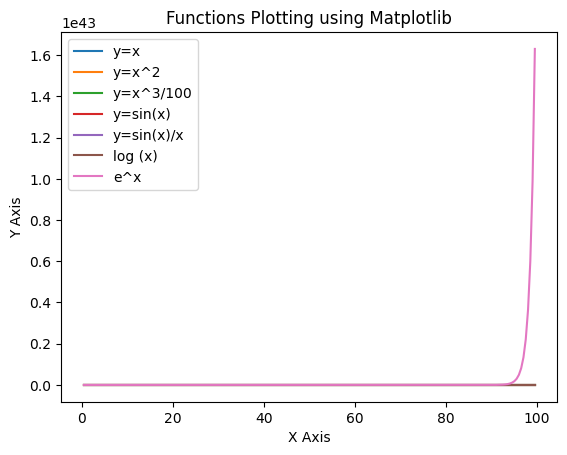

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of x values from 0.5 to 100.0 with steps of 0.5
x = np.arange(0.5, 100.0, 0.5)

# Define the functions to be plotted
y1 = x
y2 = x**2
y3 = x**3 / 100 
y4 = np.sin(x)
y5 = np.sin(x) / x 
y6 = np.log(x)
y7 = np.exp(x)

plt.plot(x, y1, label='y=x')
plt.plot(x, y2, label='y=x^2')
plt.plot(x, y3, label='y=x^3/100')
plt.plot(x, y4, label='y=sin(x)')
plt.plot(x, y5, label='y=sin(x)/x')  
plt.plot(x, y6,label='log (x)')
plt.plot (x,y7,label= 'e^x')


plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Functions Plotting using Matplotlib')
plt.legend()

# Show plot
plt.show()


In [9]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, (20, 5))


df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])


column_std = df.std()
highest_std_column = column_std.idxmax()
print(f"The column with the highest standard deviation is: {highest_std_column}")


row_mean = df.mean(axis=1)
lowest_mean_row = row_mean.idxmin()
print(f"The row with the lowest mean is: {lowest_mean_row}")


The column with the highest standard deviation is: d
The row with the lowest mean is: 19


In [11]:
# Add a new column 'f' which is the sum of the columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df.sum(axis=1)

# Create another column 'g'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in the column 'g' is 'LT8'
num_LT8 = (df['g'] == 'LT8').sum()
print(f"Number of rows where the value in the column 'g' is 'LT8': {num_LT8}")

# Find the standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8' and 'GT8' respectively
std_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_LT8}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_GT8}")


Number of rows where the value in the column 'g' is 'LT8': 17
Standard deviation of 'f' where 'g' is 'LT8': 0.4804565192993476
Standard deviation of 'f' where 'g' is 'GT8': 0.36873742690910905


In [13]:
import numpy as np

def argmin(arr):
    
    min_val = arr[0]
    min_idx = 0

    for i in range(1, len(arr)):
       
        if arr[i] < min_val:
            min_val = arr[i]
            min_idx = i

    return min_idx

# Test the function
arr = np.array([1, 3, 7, 1, 2, 0, 3, 6])
print("Array:", arr)

idx = argmin(arr)
print("Computed argmin:", idx)

# Verify the result using np.argmin
print("np.argmin:", np.argmin(arr))


Array: [1 3 7 1 2 0 3 6]
Computed argmin: 5
np.argmin: 5
